In [1]:
# 기본 사용 패키지
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns

## 한글 사용을 위한 페키지##
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic') 
mpl.rcParams['axes.unicode_minus'] = False
############################

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

# 문제 1

*   Seaborn은 Scatterplot과 histogram을 함께 나타낼 수 있는 기능을 제공합니다.
*   이 기능은 한 눈에 보기 어려웠던 데이터들을 비교적 쉽게 한눈에 보여줄 수 있는 특징이 있습니다.
*   이론 교안 19페이지에 제공된 jointplot 기능을 활용하여, 가로축이 "median house value" 세로축이 "median income"인 경우를 출력해보고, 데이터시각화 1문제의 결과와 어떤 시각적 차이를 주는지 비교해보세요.



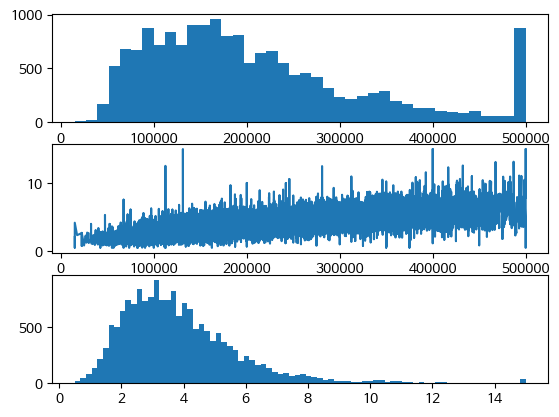

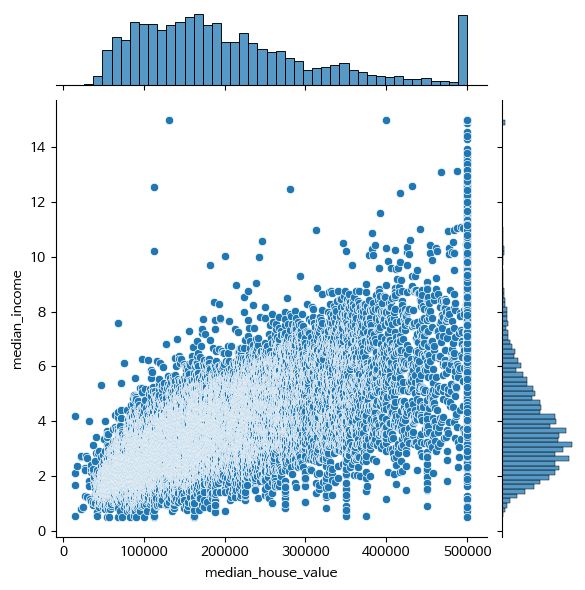

In [2]:
data_path = 'sample_data/california_housing_train.csv'
df = pd.read_csv(data_path)

df = df.sort_values(by = 'median_house_value', axis = 0)

#9주차 2번 문제 해답
plt.subplot(3,1,1)
plt.hist(df['median_house_value'], bins = 40)
#편리한 비교를 위해 bins 변수를 임의로 추가하였으며, 그대로 실행하시면 됩니다.

plt.subplot(3,1,2)
plt.plot(df['median_house_value'], df['median_income'])

plt.subplot(3,1,3)
plt.hist(df['median_income'], bins = 80)
#편리한 비교를 위해 bins 변수를 임의로 추가하였으며, 그대로 실행하시면 됩니다.

plt.show()


#추가 코드를 아래에 작성하세요.
sns.jointplot(data=df, x="median_house_value", y="median_income")
plt.show()

# 문제 2

*   Seaborn에서는 여러 데이터셋을 연습용으로 제공하고 있습니다.
*   Tip data는 레스토랑에 방문한 손님의 유형 및 지불한 팁에 대한 데이터가 정리되어 있습니다.
*   방문자 별 기재정보: 성별, 흡연여부, 방문요일 (목,금,토,일), 식사 시간대 (점심, 저녁), 식시 인원, 지불한 음식 비용, 지불한 팁 비용
*   아래 코드를 통해 tip data를 불러오고 자유롭게 다양한 그래프를 그리며 데이터를 파악해보세요.

In [3]:
tips = sns.load_dataset('tips')
tips

#여기엔 해답을 작성하실 필요가 없으며, 자유롭게 공간을 활용하여 여러 출력들을 살펴보세요.

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# 문제 2-1

*   이론 강의교안에서 주어진 바와 같이, pairplot은 여러 데이터들의 조합을 다수의 subplot으로 보여주는 방법입니다.
*   hue 인자를 사용할 경우, 데이터에서 좀 더 구체적인 정보를 획득할 수 있습니다.
*   방문 효일을 hue 인자로 하는 pairplot을 그려 데이터를 확인해 보세요.
*   주어진 예시와 같은 그림을 얻어보도록 하세요.

# 정답 예시
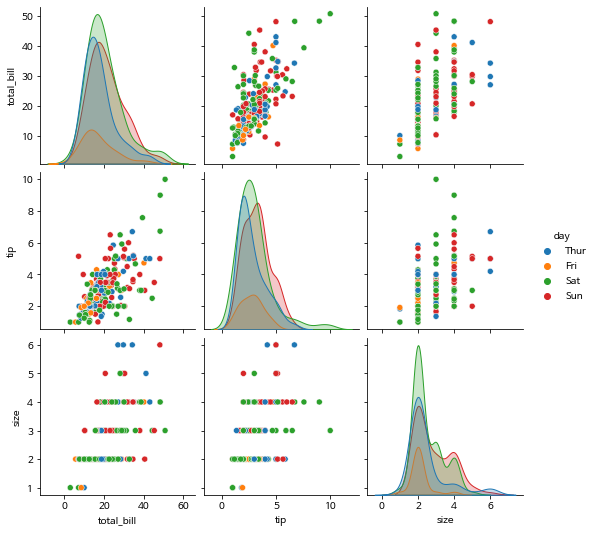 

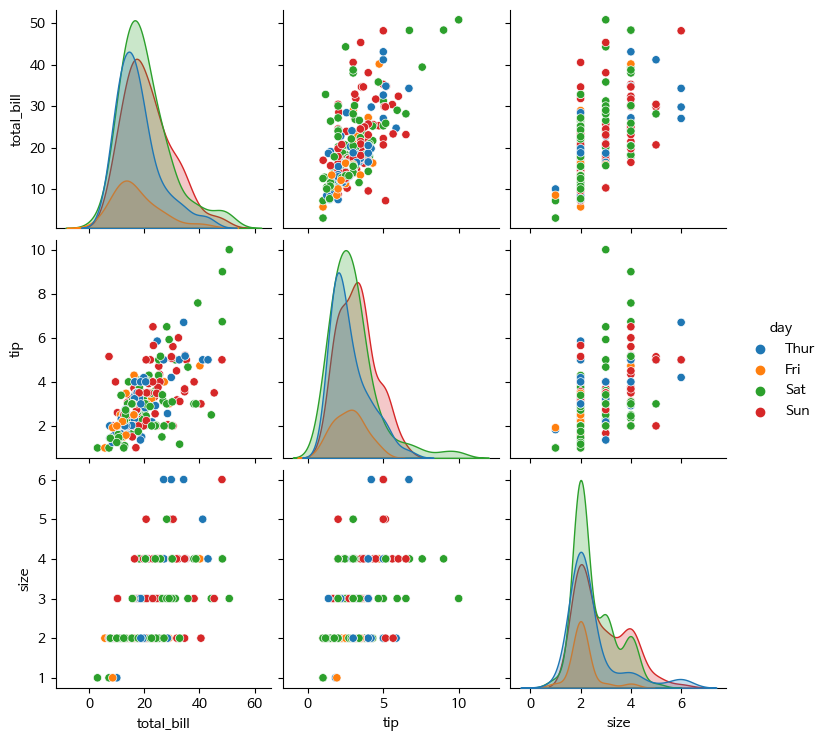

In [4]:
#여기에 코드를 작성하세요.
sns.pairplot(data=tips, hue="day")
plt.show()

# 문제 2-2

*  주문 금액과 팁의 비율을 바탕으로 메뉴의 가격 선정 전략을 세우고자 합니다.
*  tip_pct 열을 추가하여, "팁/지불비용"을 값으로 채워 dataframe을 편집하세요.
*  예를 들어, total_bill로 10달러를, tip으로 1달러를 지불한 경우, tip_pct는 0.1의 값을 가지게 됩니다.
*  아래에 첨부된 결과 그래프 예시는 방문 인원 수와 tip_pct의 관계를 확인하기 위한 box그래프입니다.
*  예시와 같은 그래프를 생성해 보시고, 추가로 total_bill과 tip_pct를 축으로 하는 scatter 그래프도 생성해보세요.
*  여러 방법으로 지불 비용 및 그에 따른 팁의 양을 분석할 수 있습니다. 예를 들어 hue 인자를 이용해 새로운 사실을 발견할 수 있습니다. 위 요구된 사항을 만족하신 후에는 자유롭게 여러 가지 사항들을 변경해 보세요.

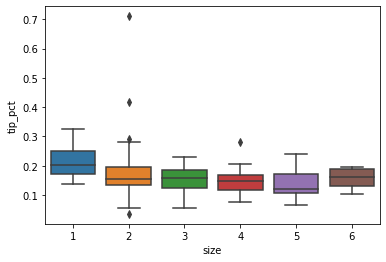




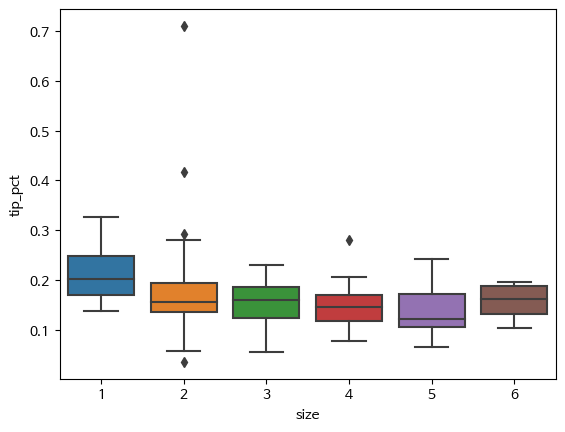

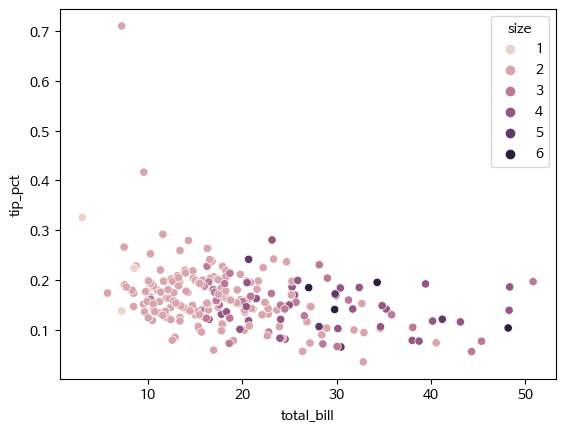

In [14]:
#여기에 코드를 작성하세요.
tips['tip_pct'] = tips['tip'] / tips['total_bill']
sns.boxplot(data=tips, x="size", y="tip_pct")
plt.show()

sns.scatterplot(data=tips, x="total_bill", y="tip_pct", hue="size")
plt.show()

# 문제 3

*   이 문제에서는 여러분은 앞서 사용하셨던 Iris dataset을 활용합니다.
*   여러분은 Iris dataset에 포함된 3가지의 species에 따른 sepal_length, sepal_width, petal_lengh, petal_width의 인자들을 한 눈에 확인할 수 있는 heatmap을 그리고자 합니다.
*   아래 주어진 예시 그림과 같이 종 별 '평균 sepal_length, sepal_width, petal_lengh, petal_width'를 확인할 수 있는 heatmap을 구성해 보세요.

*   개발 tip: "X.groupby(["col"]).mean()"과 같은 기법을 활용하여 접근해 보세요.

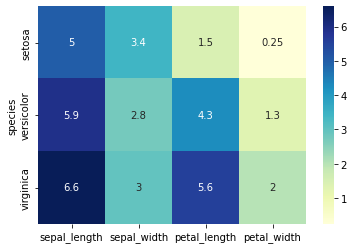



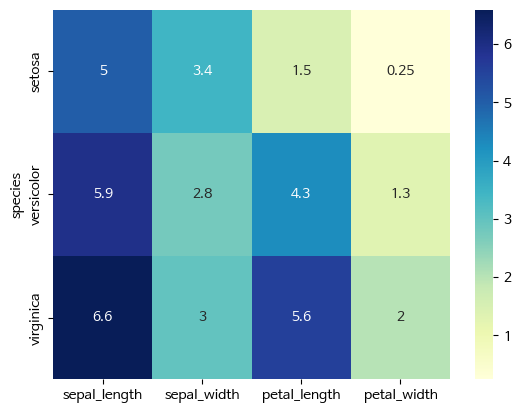

In [24]:
#여기에 코드를 작성하세요.
iris = sns.load_dataset("iris")
gb = iris.groupby("species").mean()
sns.heatmap(gb, annot=True, cmap="YlGnBu")
plt.show()